Krcmar 2016-2017 64/65 <br>
Ustyugov 2012-2012 64/65 <br>
Mesotitsch 2011/2012 54/55 <br>
Valiullin 2008/2009 54/55 <br>
Julien Robert 50/50 2005-2006 >> 65 (> 90) <br> 
Luck 58/60 2001-2002 <br>
Maiugourov 55/55 2000-2001 ~ 70 <br> 
Maiugourov 60/60 1999-2000 ~ 65 <br> 
Holubec	Jiri 60/60 1993-1994 ~ 70 <br> 


In [40]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import matplotlib.ticker as mtick

In [2]:
(30 + 202 + 161 + 65) / (30 + 210 + 185 + 65)
(30 + 202 + 65) / (30 + 210 + 65)

0.9737704918032787

In [2]:
Lagreid_prone = (30 + 202 + 161 + 65) / (30 + 210 + 185 + 65)
Lagreid_pron_no_outlier = (30 + 202 + 65) / (30 + 210 + 65)
print('Lagreid prone streak probability (number of seasons per occurrance):', 1 / (Lagreid_prone**65))
print('Lagreid prone streak probability (number of seasons per occurrance) without outlier:', 1 / (Lagreid_pron_no_outlier**65))

Lagreid prone streak probability (number of seasons per occurrance): 80.62860234627485
Lagreid prone streak probability (number of seasons per occurrance) without outlier: 5.62756282298929


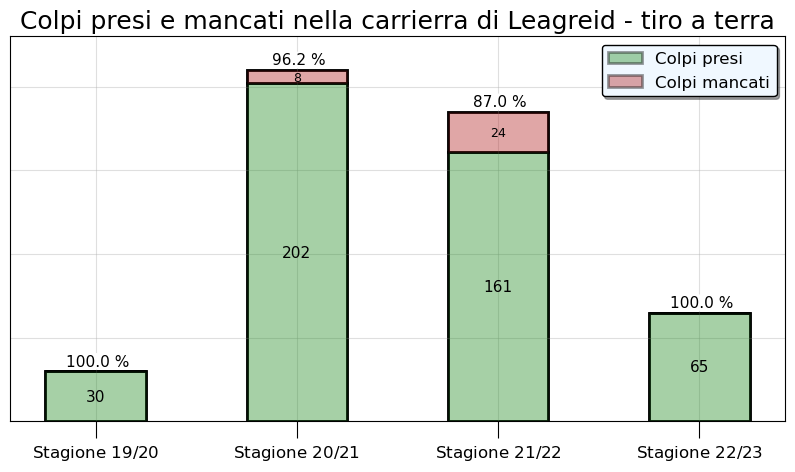

In [61]:
#
x_axis = ['Stagione $19/20$', 'Stagione $20/21$', 'Stagione $21/22$', 'Stagione $22/23$']
y_hits = [30, 202, 161, 65]
y_misses = [0, 8, 24, 0]
y_percentages = np.array(y_hits) / (np.array(y_hits) + np.array(y_misses))

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.bar(x_axis, y_hits, color='forestgreen', zorder = 3, edgecolor = 'black', alpha = 0.4, linewidth = 2, label = 'Colpi presi', width = 0.5)
ax.bar(x_axis, y_hits, color='white', zorder = 1, edgecolor = 'black', alpha =1, linewidth = 2, width = 0.5)
ax.bar(x_axis, y_misses, bottom=y_hits, color='firebrick', zorder = 3, edgecolor = 'black', alpha = 0.4, linewidth = 2, label = 'Colpi mancati', width = 0.5)
ax.bar(x_axis, y_misses, bottom=y_hits, color='white', edgecolor = 'black', alpha = 1, linewidth = 2, zorder = 1, width = 0.5)
ax.tick_params(axis='x', which='both', labelsize=12, length=12)
ax.tick_params(axis='y', which='both', labelsize=12, length=0)
ax.set_title('Colpi presi e mancati nella carrierra di Leagreid - tiro a terra', fontsize = 18)
ax.set_yticklabels([])
#ax.spines['left'].set_linestyle((1, (4, 4)))
ax.grid(zorder = 2, alpha = 0.4)
ax.legend(facecolor = 'aliceblue', edgecolor = 'black', fontsize = 12, shadow = True)
for x in range(4):
    ax.text(x, y_hits[x]/2, str(y_hits[x]), ha='center', va='center', fontsize = 11)
    if y_misses[x] > 0:
        ax.text(x, y_hits[x] + y_misses[x]/2-0.5, str(y_misses[x]), ha='center', va='center', fontsize = 9)
    
    ax.text(x + 0.01, y_hits[x] + y_misses[x] + 6, f'{y_percentages[x]*100:.1f} %', ha='center', va='center', fontsize = 11,\
            bbox=dict(facecolor='white', boxstyle='round,pad=0', edgecolor = 'w'))

ax.set_ylim(0, 230)
plt.show()

In [4]:
initial_season = 1984
all_seasons = np.arange(initial_season, 2022)
columns_df = pd.read_csv(f'../../../../Workspace/BiathlonAzzurroWrapper/data/shooting_data/men/\
shooting_{initial_season}_{initial_season + 1}.txt', sep = '\t').columns

In [5]:
final_df = pd.DataFrame(columns = columns_df)
for season in all_seasons:
    df = pd.read_csv(f'../../../../Workspace/BiathlonAzzurroWrapper/data/shooting_data/men/\
shooting_{season}_{season + 1}.txt', sep = '\t')
    df['Season'] = f'{season}_{season + 1}'
    df = df[df['Prone\nshots'] >= 65]
    df['fullName'] = df['Given Name'] + ' ' + df['Family\xa0Name']
    final_df = pd.concat([final_df, df], axis = 0)



In [6]:
def sim_func(n, p):
    draws =  np.random.uniform(low = 0, high = 1, size = n)
    outcome = np.zeros_like(draws)
    outcome[draws <= p] = 1
    return outcome
#


In [7]:
column_indexes = {'Season':list(final_df.columns).index('Season'), 'fullName': list(final_df.columns).index('fullName'),\
    'proneShots': list(final_df.columns).index('Prone\nshots'), 'pronePercentage':list(final_df.columns).\
        index('Prone\nhit rate\n(in %)')}
#column_indexes = 

In [8]:
def simulation_outcome(row, dic_ind, final_dict):
    n = row[dic_ind['proneShots']]
    p = row[dic_ind['pronePercentage']]/100
    season = row[dic_ind['Season']]
    athlete = row[dic_ind['fullName']]
    zeros_list = [np.where(sim_func(n, p).astype(int) == 0)[0] for _ in range(10000)]
    def zeros_func(zeros_list):
        if len(zeros_list) == 0:
            return 0
        else:
            return zeros_list[0]
    
    final_dict[season][athlete] = list(map(zeros_func, zeros_list))

     
    return final_dict


In [9]:
dict_simulation = {}
for season in all_seasons:
    dict_simulation[f'{season}_{season + 1}'] = {}

In [10]:
dictFinal = np.apply_along_axis(simulation_outcome, axis = 1, arr = np.array(final_df), final_dict = dict_simulation,\
    dic_ind = column_indexes)

In [11]:
final_df = pd.DataFrame()

In [12]:
for season in all_seasons:
    df1 = pd.DataFrame(pd.DataFrame(dictFinal[0][f'{season}_{season + 1}'])\
        .max(axis = 1), columns = [f'{season}_{season + 1}'])
    df2 = pd.DataFrame(pd.DataFrame(dictFinal[0][f'{season}_{season + 1}'])\
        .idxmax(axis = 1), columns = [f'{season}_{season + 1}_athletes']) 

    final_df = pd.concat([final_df, df1, df2], axis = 1)
        

/var/folders/92/pt64shtn3fx70tf0m4ng91240000gn/T/ipykernel_5194/504576944.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df2 = pd.DataFrame(pd.DataFrame(dictFinal[0][f'{season}_{season + 1}'])\
/var/folders/92/pt64shtn3fx70tf0m4ng91240000gn/T/ipykernel_5194/504576944.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df2 = pd.DataFrame(pd.DataFrame(dictFinal[0][f'{season}_{season + 1}'])\


In [13]:
final_df = final_df.drop(columns = ['1985_1986', '1985_1986_athletes'])
final_df = final_df.drop(columns = ['1989_1990', '1989_1990_athletes'])
final_df

,1984_1985,1984_1985_athletes,1986_1987,1986_1987_athletes,1987_1988,1987_1988_athletes,1988_1989,1988_1989_athletes,1990_1991,1990_1991_athletes,...,2017_2018,2017_2018_athletes,2018_2019,2018_2019_athletes,2019_2020,2019_2020_athletes,2020_2021,2020_2021_athletes,2021_2022,2021_2022_athletes
0,45,Ralf Goethel,26,Jan Matous,26,Tapio Piiponen,16,Lionel Laurent,40,Lindsay Bridgford,...,31,Daniel Mesotitsch,51,Michal Slesingr,48,Arnd Peiffer,36,Simon Eder,92,Erik Lesser
1,23,Herbert Fritzenwenger,30,Werner Kiem,40,Gottlieb Taschler,33,Thierry Gerbier,48,Fritz Fischer,...,103,Maxim Tsvetkov,55,Jakov Fak,52,Tarjei Boe,29,Benjamin Weger,45,Sivert Guttorm Bakken
2,20,Alfred Eder,43,Frantisek Chladek,29,Alfred Eder,49,Andreas Zingerle,39,Gisle Fenne,...,52,Lowell Bailey,36,Lowell Bailey,159,Martin Fourcade,93,David Komatz,29,Peppe Femling
3,38,Herbert Fritzenwenger,28,Matthias Jacob,36,Fritz Fischer,40,Lionel Laurent,46,Geir Einang,...,41,Michal Slesingr,58,Tomas Kaukenas,27,Jakov Fak,75,Thomas Bormolini,81,Erik Lesser
4,10,Frank Peter Roetsch,33,Alfred Eder,47,Fritz Fischer,35,Hubert Leitgeb,64,Andre Sehmisch,...,48,Florent Claude,47,Olli Hiidensalo,41,Jakov Fak,46,Simon Eder,46,Florent Claude
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,16,Frank Peter Roetsch,19,Tapio Piiponen,51,Matthias Jacob,33,Andreas Zingerle,30,Gisle Fenne,...,81,Dominik Landertinger,53,Michal Slesingr,52,Sergey Bocharnikov,72,Sturla Holm Laegreid,36,Roman Rees
9996,23,Frank Peter Roetsch,69,Jan Matous,39,Matthias Jacob,86,Thierry Gerbier,31,Aleksander Grajf,...,66,Florent Claude,63,Lowell Bailey,38,Johannes Dale,27,Jakov Fak,84,Erik Lesser
9997,37,Ralf Goethel,35,Matthias Jacob,37,Vladimir Velitschkov,43,Xavier Blond,18,Duncan Douglas,...,37,Erik Lesser,42,Mikito Tachizaki,43,Tarjei Boe,65,Simon Eder,66,Miha Dovzan
9998,26,Francis Mougel,51,Anatoli Zhdanovitch,27,Matthias Jacob,55,Andreas Zingerle,22,Fritz Fischer,...,41,Jakov Fak,48,Michael Roesch,75,Martin Fourcade,45,Artem Tyshchenko,37,Miha Dovzan


In [14]:
final_df_athletes = final_df[[col for col in final_df.columns if 'athletes' in col]]
final_df_athletes

,1984_1985_athletes,1986_1987_athletes,1987_1988_athletes,1988_1989_athletes,1990_1991_athletes,1991_1992_athletes,1992_1993_athletes,1993_1994_athletes,1994_1995_athletes,1995_1996_athletes,...,2012_2013_athletes,2013_2014_athletes,2014_2015_athletes,2015_2016_athletes,2016_2017_athletes,2017_2018_athletes,2018_2019_athletes,2019_2020_athletes,2020_2021_athletes,2021_2022_athletes
0,Ralf Goethel,Jan Matous,Tapio Piiponen,Lionel Laurent,Lindsay Bridgford,Mikael Loefgren,Bruno Hofstaetter,Jiri Holubec,Jiri Holubec,Tomasz Sikora,...,Jean Guillaume Beatrix,Jean Guillaume Beatrix,Daniel Boehm,Tarjei Boe,Emil Hegle Svendsen,Daniel Mesotitsch,Michal Slesingr,Arnd Peiffer,Simon Eder,Erik Lesser
1,Herbert Fritzenwenger,Werner Kiem,Gottlieb Taschler,Thierry Gerbier,Fritz Fischer,Wolfgang Perner,Johann Passler,Sylfest Glimsdal,Edouard Riabov,Dan Westover,...,Serguei Sednev,Markus Windisch,Fredrik Lindstroem,Erik Lesser,Martin Fourcade,Maxim Tsvetkov,Jakov Fak,Tarjei Boe,Benjamin Weger,Sivert Guttorm Bakken
2,Alfred Eder,Frantisek Chladek,Alfred Eder,Andreas Zingerle,Gisle Fenne,Wolfgang Perner,Alfred Eder,Valeri Kirienko,Hubert Leitgeb,Franck Perrot,...,Jean Guillaume Beatrix,Alexey Volkov,Vladimir Chepelin,Emil Hegle Svendsen,Lowell Bailey,Lowell Bailey,Lowell Bailey,Martin Fourcade,David Komatz,Peppe Femling
3,Herbert Fritzenwenger,Matthias Jacob,Fritz Fischer,Lionel Laurent,Geir Einang,Mikael Loefgren,Alfred Eder,Alfred Eder,Jean Marc Chabloz,Erkki Latvala,...,Christian De Lorenzi,Emil Hegle Svendsen,Tomas Krupcik,Christian Gow,Kauri Koiv,Michal Slesingr,Tomas Kaukenas,Jakov Fak,Thomas Bormolini,Erik Lesser
4,Frank Peter Roetsch,Alfred Eder,Fritz Fischer,Hubert Leitgeb,Andre Sehmisch,Steffen Hoos,Alfred Eder,Jon Age Tyldum,Vadim Sashurin,Tomasz Sikora,...,Serguei Sednev,Jean Guillaume Beatrix,Karol Dombrovski,Lowell Bailey,Simon Schempp,Florent Claude,Olli Hiidensalo,Jakov Fak,Simon Eder,Florent Claude
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Frank Peter Roetsch,Tapio Piiponen,Matthias Jacob,Andreas Zingerle,Gisle Fenne,Hubert Leitgeb,Johann Passler,Alfred Eder,Michael Dixon,Herve Flandin,...,Serguei Sednev,Pavol Hurajt,Alexander Os,Fredrik Lindstroem,Lowell Bailey,Dominik Landertinger,Michal Slesingr,Sergey Bocharnikov,Sturla Holm Laegreid,Roman Rees
9996,Frank Peter Roetsch,Jan Matous,Matthias Jacob,Thierry Gerbier,Aleksander Grajf,Lionel Laurent,Steffen Hoos,Alfred Eder,Vadim Sashurin,Vladimir Drachev,...,Lowell Bailey,Lowell Bailey,Dominik Landertinger,Fredrik Lindstroem,Arnd Peiffer,Florent Claude,Lowell Bailey,Johannes Dale,Jakov Fak,Erik Lesser
9997,Ralf Goethel,Matthias Jacob,Vladimir Velitschkov,Xavier Blond,Duncan Douglas,Steffen Hoos,Jiri Holubec,Patrice Bailly-Salins,Vadim Sashurin,Ricco Gross,...,Dmitry Malyshko,Daniel Boehm,Yan Savitskiy,Karol Dombrovski,Jean Guillaume Beatrix,Erik Lesser,Mikito Tachizaki,Tarjei Boe,Simon Eder,Miha Dovzan
9998,Francis Mougel,Anatoli Zhdanovitch,Matthias Jacob,Andreas Zingerle,Fritz Fischer,Frode Loeberg,Tomas Kos,Pieralberto Carrara,Frank Luck,Ricco Gross,...,Simon Desthieux,Jean-Philippe Le Guellec,Jakov Fak,Krasimir Anev,Lowell Bailey,Jakov Fak,Michael Roesch,Martin Fourcade,Artem Tyshchenko,Miha Dovzan


In [15]:
final_df_hits = final_df[[col for col in final_df.columns if 'athletes' not in col]]
final_df_hits

,1984_1985,1986_1987,1987_1988,1988_1989,1990_1991,1991_1992,1992_1993,1993_1994,1994_1995,1995_1996,...,2012_2013,2013_2014,2014_2015,2015_2016,2016_2017,2017_2018,2018_2019,2019_2020,2020_2021,2021_2022
0,45,26,26,16,40,54,67,57,30,44,...,46,29,53,58,28,31,51,48,36,92
1,23,30,40,33,48,24,40,73,38,26,...,51,29,45,55,25,103,55,52,29,45
2,20,43,29,49,39,17,37,30,33,60,...,37,44,44,57,67,52,36,159,93,29
3,38,28,36,40,46,27,53,90,44,73,...,38,64,45,40,32,41,58,27,75,81
4,10,33,47,35,64,13,66,37,35,34,...,56,72,64,37,49,48,47,41,46,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,16,19,51,33,30,39,45,87,35,26,...,63,48,26,73,59,81,53,52,72,36
9996,23,69,39,86,31,15,59,49,67,78,...,58,28,42,48,61,66,63,38,27,84
9997,37,35,37,43,18,37,27,35,83,36,...,70,59,63,56,52,37,42,43,65,66
9998,26,51,27,55,22,21,58,55,61,26,...,39,37,39,67,56,41,48,75,45,37


In [25]:
ge_65_prob = final_df_hits.ge(65).sum(axis = 0)/10000

In [64]:
np.mean(final_df_hits.ge(65).sum(axis = 1))

4.7789

/var/folders/92/pt64shtn3fx70tf0m4ng91240000gn/T/ipykernel_5194/1481629616.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(list(map(lambda x: x.replace('_', '-'), ge_65_prob.index)), rotation = 90)


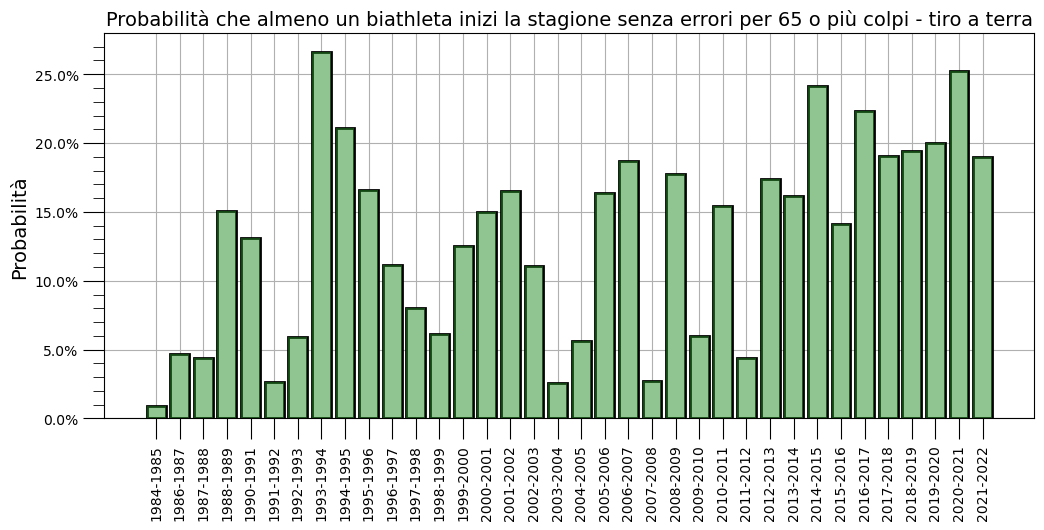

In [54]:
fig, ax = plt.subplots(figsize = (12, 5))
ax.bar(list(map(lambda x: x.replace('_', '-'), ge_65_prob.index)), np.array(ge_65_prob.values) * 100, color = 'forestgreen',\
     linewidth = 2, zorder = 3, alpha = 0.5)
ax.bar(list(map(lambda x: x.replace('_', '-'), ge_65_prob.index)), np.array(ge_65_prob.values) * 100, color = 'white',\
     linewidth = 2, zorder = 2, edgecolor = 'black')
ax.set_xticklabels(list(map(lambda x: x.replace('_', '-'), ge_65_prob.index)), rotation = 90)
ax.tick_params(axis='both', which='major', length=15)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.tick_params(axis='y', which='minor', length=8)
ax.minorticks_on()
ax.tick_params(axis='x', which='minor', length=0)
ax.set_ylabel('Probabilità', fontsize = 14)
ax.set_title('Probabilità che almeno un biathleta inizi la stagione senza errori per 65 o più colpi - tiro a terra', fontsize = 14)
ax.grid(zorder = 1)
plt.show()

In [17]:
dict_occurrances_streak = {}
for column in final_df_athletes.columns:
    dict_occurrances_streak[column] = dict(pd.DataFrame(np.array(final_df_athletes)*np.array(final_df_hits.ge(65)),\
         columns = final_df_athletes.columns)[column].value_counts()[1:])

1988_1989_athletes': {'Andreas Zingerle': 584 <br>
'1993_1994_athletes': {'Jiri Holubec': 1422 <br>
'1999_2000_athletes': {'Rene Cattarinussi': 429 <br>
'2005_2006_athletes': {'Julien Robert': 1341 <br>
'2006_2007_athletes': {'Ricco Gross': 1259 <br>
'2016_2017_athletes': {'Lowell Bailey': 1122 <br>
'2020_2021_athletes': {'Simon Eder': 1029,
  'Sturla Holm Laegreid': 697, <br>
'2021_2022_athletes': {'Erik Lesser': 1085 <br>


In [18]:
dict_occurrances_streak

{'1984_1985_athletes': {'Herbert Fritzenwenger': 40,
  'Frank Peter Roetsch': 23,
  'Juri Kashkarov': 14,
  'Ralf Goethel': 9,
  'Francis Mougel': 1},
 '1986_1987_athletes': {'Tapio Piiponen': 211,
  'Matthias Jacob': 115,
  'Alfred Eder': 45,
  'Fritz Fischer': 29,
  'Jan Matous': 23,
  'Jiri Holubec': 12,
  'Frank Peter Roetsch': 11,
  'Herve Flandin': 5,
  'Vladimir Velitschkov': 5,
  'Georg Fischer': 3,
  'Herbert Fritzenwenger': 2,
  'Antero Laehde': 2,
  'Gottlieb Taschler': 2},
 '1987_1988_athletes': {'Tapio Piiponen': 175,
  'Matthias Jacob': 117,
  'Fritz Fischer': 43,
  'Alfred Eder': 36,
  'Jan Matous': 18,
  'Vladimir Velitschkov': 14,
  'Jiri Holubec': 12,
  'Frank Peter Roetsch': 10,
  'Gottlieb Taschler': 5,
  'Georg Fischer': 2,
  'Oivind Nerhagen': 2,
  'Herve Flandin': 1,
  'Eric Claudon': 1,
  'Mark Longin': 1,
  'Anton Lengauer-Stockner': 1,
  'Herbert Fritzenwenger': 1},
 '1988_1989_athletes': {'Andreas Zingerle': 600,
  'Thierry Gerbier': 353,
  'Egon Leitner': 26

In [55]:
ge_95_prob = final_df_hits.ge(95).sum(axis = 0)/10000

/var/folders/92/pt64shtn3fx70tf0m4ng91240000gn/T/ipykernel_5194/1774393209.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(list(map(lambda x: x.replace('_', '-'), ge_95_prob.index)), rotation = 90)


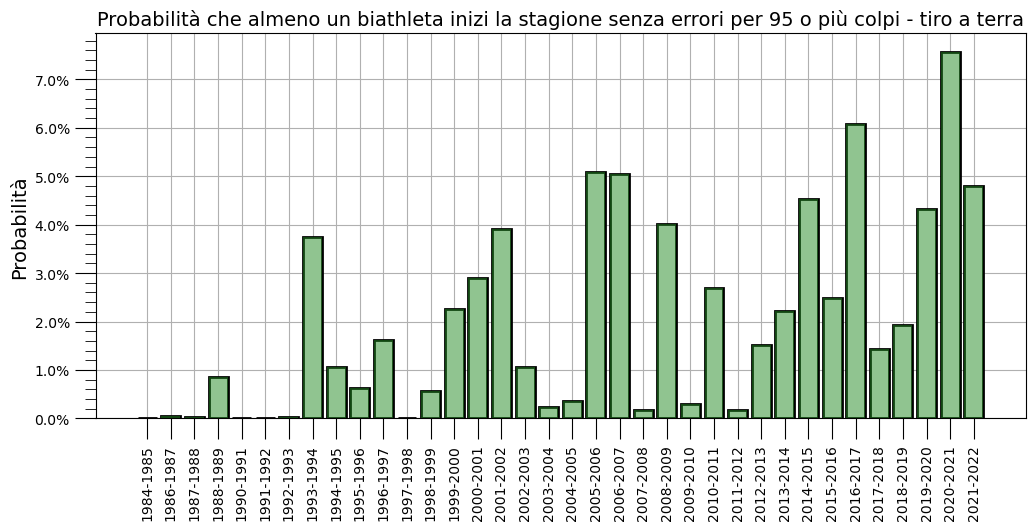

In [58]:
fig, ax = plt.subplots(figsize = (12, 5))
ax.bar(list(map(lambda x: x.replace('_', '-'), ge_95_prob.index)), np.array(ge_95_prob.values) * 100, color = 'forestgreen',\
     linewidth = 2, zorder = 3, alpha = 0.5)
ax.bar(list(map(lambda x: x.replace('_', '-'), ge_95_prob.index)), np.array(ge_95_prob.values) * 100, color = 'white',\
     linewidth = 2, zorder = 2, edgecolor = 'black')
ax.set_xticklabels(list(map(lambda x: x.replace('_', '-'), ge_95_prob.index)), rotation = 90)
ax.tick_params(axis='both', which='major', length=15)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.tick_params(axis='y', which='minor', length=8)
ax.minorticks_on()
ax.tick_params(axis='x', which='minor', length=0)
ax.set_ylabel('Probabilità', fontsize = 14)
ax.set_title('Probabilità che almeno un biathleta inizi la stagione senza errori per 95 o più colpi - tiro a terra', fontsize = 14)
ax.grid(zorder = 1)
plt.show()

In [20]:
seasons_probability = np.any(np.array(final_df_hits.ge(65)), axis = 1).sum()/10000
seasons_probability

0.9956

In [59]:
seasons_probability = np.any(np.array(final_df_hits.ge(95)), axis = 1).sum()/10000
seasons_probability

0.529

In [21]:
seasons_probability = np.any(np.array(final_df_hits.ge(130)), axis = 1).sum()/10000
seasons_probability

0.0961

In [40]:
tmp1 = pd.DataFrame(pd.DataFrame(dictFinal[0]['1984_1985']).max(axis = 1), columns = ['1984_1985'])
tmp2 = pd.DataFrame(pd.DataFrame(dictFinal[1]['1984_1985']).idxmax(axis = 1), columns = ['1984_1985_athletes'])
tmp = pd.concat([tmp1, tmp2], axis = 1)
tmp

,1984_1985,1984_1985_athletes
0,13,Ralf Goethel
1,14,Andre Sehmisch
2,33,Frank Peter Roetsch
3,35,Frank Peter Roetsch
4,18,Ralf Goethel
...,...,...
9995,31,Andre Sehmisch
9996,12,Ralf Goethel
9997,18,Andre Sehmisch
9998,55,Herbert Fritzenwenger


In [38]:
pd.DataFrame(pd.DataFrame(dictFinal[0]['1984_1985']).max(axis = 1))

,0
0,13
1,14
2,33
3,35
4,18
...,...
9995,31
9996,12
9997,18
9998,55


,0
0,Ralf Goethel
1,Andre Sehmisch
2,Frank Peter Roetsch
3,Frank Peter Roetsch
4,Ralf Goethel
...,...
9995,Andre Sehmisch
9996,Ralf Goethel
9997,Andre Sehmisch
9998,Herbert Fritzenwenger


In [35]:
season = initial_season
while season <= 2022:
    with open(f'../../../../Workspace/BiathlonAzzurroWrapper/data/shooting_data/men/shooting_{season}_{season + 1}.txt', mode='w') as f:
        pass
    season += 1